# Εργαστήριο 9
Όπως και στα προηγούμενα εργαστήρια συνεχίζουμε στο περιβάλλον του [online chisel bootcamp](https://mybinder.org/v2/gh/freechipsproject/chisel-bootcamp/master).

Πριν ξεκινήσετε, εκτελέστε τα επόμενα 2 κελιά:

In [ ]:
val path = System.getProperty("user.dir") + "/source/load-ivy.sc"
interp.load.module(ammonite.ops.Path(java.nio.file.FileSystems.getDefault().getPath(path)))

In [ ]:
import chisel3._
import chisel3.util._
import chisel3.tester._
import chisel3.tester.RawTester.test
import dotvisualizer._

## Προαπαιτούμενα modules
Για την υλοποίηση της τρέχουσας άσκησης θα χρειαστείτε **από τις προηγούμενες ασκήσεις**:

* Το παραμετρικό module `RegisterFile`

* Το παραμετρικό module `Alu`


 **Αντιγράψτε** τα πιο πάνω modules στα επόμενα 2 κελιά.
 
 *Σημ.: Εάν δεν έχετε τα ζητούμενα modules **και μόνον τότε**, μπορείτε να χρησιμοποιήσετε τις [υποδειγματικές λύσεις](https://mixstef.github.io/courses/comparch/backup.ipynb) στη θέση τους.*

In [ ]:
class RegisterFile(word_w: Int, sel_w: Int) extends Module {

  // αντιγράψτε το περιεχόμενο του δικού σας module εδώ
   
}

In [ ]:
class Alu(word_w: Int) extends Module {
    
  // αντιγράψτε το περιεχόμενο του δικού σας module εδώ 
    
}

## Άσκηση
Εδώ υλοποιείτε μια πρώτη εκδοχή του module `DataPath` που συνδυάζει **register file 8 καταχωρητών με εύρος λέξης 8 bits** και **alu των 8 bits**
για την υλοποίηση ενός κυκλώματος που θα μπορεί να εκτελεί πράξεις μεταξύ καταχωρητών και να
αποθηκεύει το αποτέλεσμα σε καταχωρητή (δεν υπάρχει ακόμα, δηλαδή, μνήμη και μονάδα ελέγχου).

Η υλοποίηση πέπει να γίνει σύμφωνα με το επόμενο σχήμα:

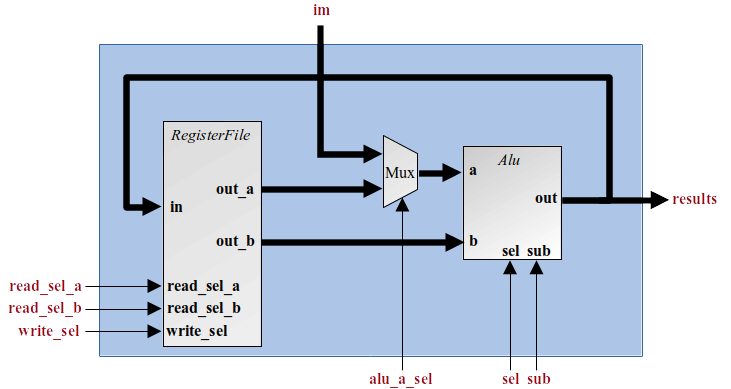


Στο σχήμα, το μοναδικό νέο σήμα είναι το `alu_a_sel` (για τα υπόλοιπα σήματα ανατρέξτε στο αντίστοιχο εργαστήριο του alu ή του registerfile).

Η λειτουργία του σήματος `alu_a_sel` είναι η ακόλουθη:

* Όταν το `alu_a_sel` είναι 0, τότε στην είσοδο a της alu εισάγεται η λέξη της εισόδου `im`.


* Όταν το `alu_a_sel` είναι 1, τότε στην είσοδο a της alu εισάγεται η έξοδος `out_a` του register file.


Συμπληρώστε ό,τι χρειάζεται στο επόμενο κελί, έτσι ώστε να παραχθεί το κύκλωμα του σχήματος.

**Υπόδειξη:** όταν έχετε να επιλέξετε 1 από 2 σήματα σύμφωνα με μια συνθήκη (πολυπλέκτης 2-σε-1), μπορείτε να χρησιμοποιήσετε την ενσωματωμένη δομή `Mux()` της Chisel, π.χ.:

~~~scala
alu.io.a := Mux(io.alu_a_sel === 0.U,io.im,regfile.io.out_a)
~~~

Το πιο πάνω σημαίνει ότι αν το `io.alu_a_sel` είναι 0.U, τότε η είσοδος της alu `alu.io.a` συνδέεται στο σήμα `io.im`, αλλιώς συνδέεται στο `regfile.io.out_a`.

In [ ]:
class DataPath(word_w: Int, sel_w: Int) extends Module {
  val io = IO(new Bundle {
    
    // προσθέστε εισόδους και εξόδους. Προσοχή: πρέπει να ονομάζονται όπως στο προηγούμενο σχήμα!
      
  })
    
  // διατηρήστε τις επόμενες 2 γραμμές
  val regfile = Module(new RegisterFile(word_w,sel_w))
  val alu = Module(new Alu(word_w))
  
  // διατηρήστε το επόμενο, για να επιλέγετε την πηγή της εισόδου a της ALU
  alu.io.a := Mux(io.alu_a_sel === 0.U,io.im,regfile.io.out_a)
    
  // ομοίως, συμπληρώστε τις υπόλοιπες συνδέσεις σύμφωνα με το σχήμα
  
}

## Δοκιμή κυκλώματος datapath
Μελετήστε προσεκτικά τι κάνει ο επόμενος δοκιμαστικός κώδικας:

Η μεταβλητή `cmdbits` είναι μια λίστα (List) από Vectors.
* Στη Scala, List είναι μια ακολουθία που μπορούμε να διασχίσουμε από την μια άκρη στην άλλη (όχι όμως να πάρουμε το i-οστό στοιχείο). Εδώ έχουμε ένα `for (bits <- cmdbits) {}` που σε κάθε επανάληψη αναθέτει στη μεταβλητή `bits` ένα-ένα τα περιεχόμενα της λίστας `cmdbits`.

* Vector στη Scala είναι μια δομή που μπορούμε να προσπελάσουμε το i-οστό στοιχείο. Στον κώδικα που ακολουθεί παίρνουμε τις τιμές κάθε vector και οδηγούμε ανάλογα τα σήματα εισόδου του datapath. Στη συνέχεια δίνουμε έναν παλμό ρολογιού και τυπώνουμε την έξοδο `results`. Αυτό επεναλαμβάνεται για κάθε vector της λίστας.

Όπως φαίνεται, στον επόμενο κώδικα γίνονται 2 "λειτουργίες". **Μπορείτε να βρείτε ποιες είναι αυτές;**

In [ ]:
test(new DataPath(8,3)) { c =>
  // array of command bits, in (read_sel_a,read_sel_b,alu_a_sel,im,sel,sub,write_sel) vectors
  val cmdbits = List(Vector(0.U,0.U,0.U,33.U,"b01".U,0.U,1.U),   // λειτουργία Α
                     Vector(0.U,1.U,1.U,0.U,"b01".U,0.U,0.U)     // λειτουργία Β
                    )
      
  for (bits <- cmdbits) {
    c.io.read_sel_a.poke(bits(0))
    c.io.read_sel_b.poke(bits(1))
    c.io.alu_a_sel.poke(bits(2))
    c.io.im.poke(bits(3))
    c.io.sel.poke(bits(4))
    c.io.sub.poke(bits(5))
    c.io.write_sel.poke(bits(6))
    println(c.io.results.peek())
    c.clock.step()
  }  
}

### Δοκιμάστε κι εσείς
Μπορείτε να τροποποιήσετε το περιεχόμενο της λίστας `cmdbits` (προσθέτοντας κι άλλα vectors, αν χρειάζεται), έτσι ώστε να υλοποιηθούν οι εξής λειτουργίες:
~~~
r1 = 33
r2 = 34
r3 = r1 + r2
~~~

**Θυμηθείτε ότι μπορείτε να τροποποιήσετε στον κώδικα μόνο το περιεχόμενο της λίστας `cmdbits`!**

In [ ]:
test(new DataPath(8,3)) { c =>
  // array of command bits, in (read_sel_a,read_sel_b,alu_a_sel,im,sel,sub,write_sel) vectors
  val cmdbits = List(Vector(...συμπληρώστε...),   // r1 = 33
                     Vector(...συμπληρώστε...),   // r2 = 34
                     Vector(...συμπληρώστε...),   // r3 = r1 + r2
                    )
      
  for (bits <- cmdbits) {
    c.io.read_sel_a.poke(bits(0))
    c.io.read_sel_b.poke(bits(1))
    c.io.alu_a_sel.poke(bits(2))
    c.io.im.poke(bits(3))
    c.io.sel.poke(bits(4))
    c.io.sub.poke(bits(5))
    c.io.write_sel.poke(bits(6))
    println(c.io.results.peek())
    c.clock.step()
  }  
}